In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=1)
xtest.shape

(120, 2)

**Standard Scaler**

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()
#learn the parameter mean,S.deviation

scaler.fit(xtrain)
#tranform the data
xtrain_scaled=scaler.transform(xtrain)
xtest_scaled=scaler.transform(xtest)
# print(xtrain_scaled)
np.round(pd.DataFrame(xtrain_scaled).describe(),1)
##after transforming the mean=0,S.D=1


,0,1
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.1
75%,0.6,0.5
max,2.2,2.4


[Text(0.5, 1.0, 'Before Scaling(Scatter-PLot)'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Estimated Salary')]

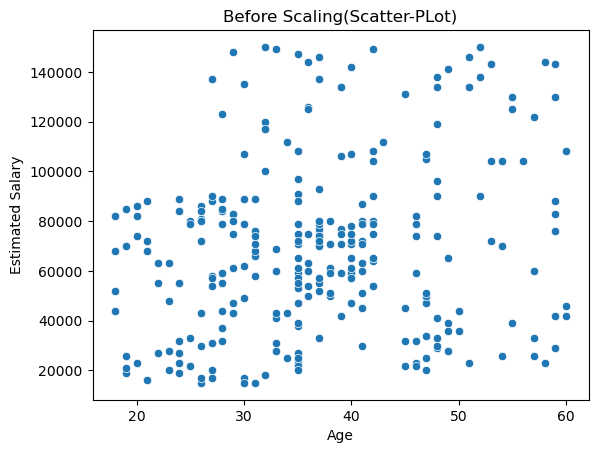

In [53]:
sns.scatterplot(x=xtrain['Age'],y=xtrain['EstimatedSalary']).set(
    title='Before Scaling(Scatter-PLot)',
    xlabel='Age',
    ylabel='Estimated Salary')

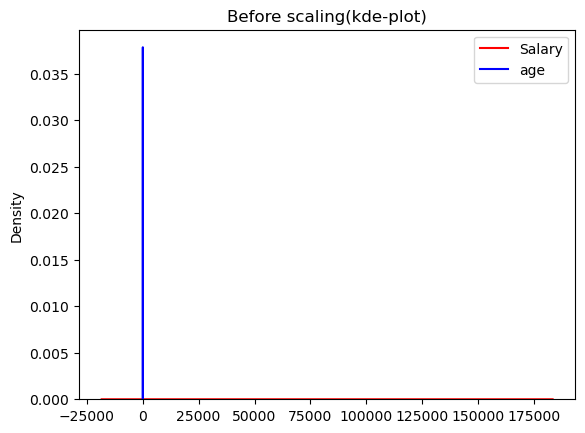

In [54]:
sns.kdeplot(data=xtrain[['Age', 'EstimatedSalary']], 
            palette=['blue', 'red'], 
            common_norm=False, 
            legend=True).set(
    title="Before scaling(kde-plot)"
)
plt.legend(labels=['Salary','age'])


[Text(0.5, 1.0, 'After Scaling(Scatter-Plot)'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Estimated Salary')]

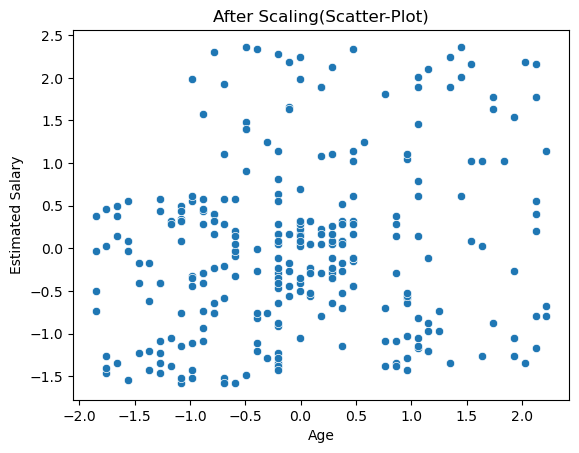

In [55]:
sns.scatterplot(x=xtrain_scaled[:,0],y=xtrain_scaled[:,1]).set(
      title='After Scaling(Scatter-Plot)',
    xlabel='Age',
    ylabel='Estimated Salary')

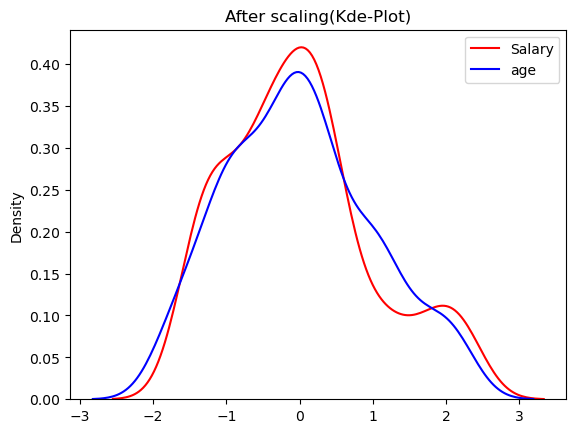

In [56]:
sns.kdeplot(data=pd.DataFrame(xtrain_scaled,columns=['Age', 'EstimatedSalary'])[['Age', 'EstimatedSalary']], 
            palette=['blue', 'red'], 
            common_norm=False, 
            legend=True).set(
    title="After scaling(Kde-Plot)"
)
plt.legend(labels=['Salary','age'])


**Effect of scaling in Individual feature**

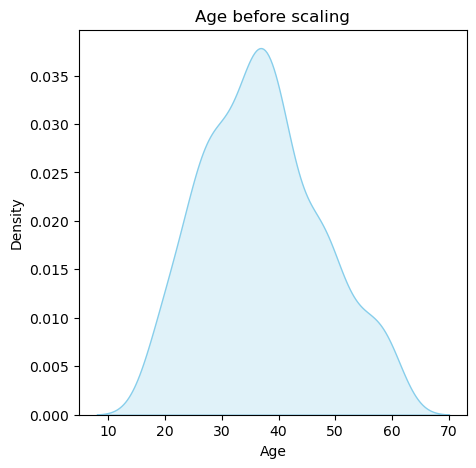

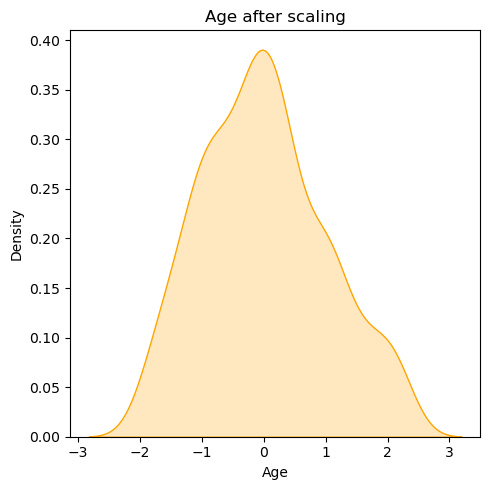

In [57]:
fig, ax1 = plt.subplots(figsize=(5, 5))
fig, ax2 = plt.subplots(figsize=(5, 5))

sns.kdeplot(x=xtrain['Age'],ax=ax1, fill=True, color='skyblue')
sns.kdeplot(x=pd.DataFrame(xtrain_scaled,columns=['Age', 'EstimatedSalary'])['Age'], ax=ax2, fill=True, color='orange')

ax1.set_title('Age before scaling')
ax2.set_title('Age after scaling')
plt.tight_layout()
plt.show()


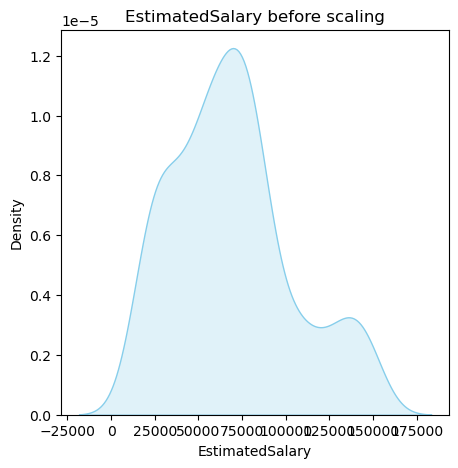

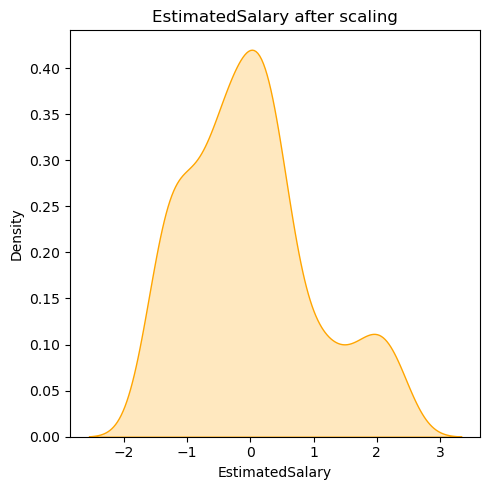

In [58]:
fig, ax1 = plt.subplots(figsize=(5, 5))
fig, ax2 = plt.subplots(figsize=(5, 5))

sns.kdeplot(x=xtrain['EstimatedSalary'],ax=ax1, fill=True, color='skyblue')
sns.kdeplot(x=pd.DataFrame(xtrain_scaled,columns=['Age', 'EstimatedSalary'])['EstimatedSalary'], ax=ax2, fill=True, color='orange')

ax1.set_title('EstimatedSalary before scaling')
ax2.set_title('EstimatedSalary after scaling')
plt.tight_layout()
plt.show()


**Why scaling is important**

In [59]:
from  sklearn.linear_model import LogisticRegression

In [60]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [66]:
lr.fit(xtrain,ytrain)
lr_scaled.fit(pd.DataFrame(xtrain_scaled,columns=xtrain.columns),ytrain)

ValueError: Index data must be 1-dimensional

In [65]:
y_pred=lr.predict(xtest)
y_pred_scaled=lr_scaled.predict(pd.DataFrame(xtest_scaled,columns=xtestcolumns))
print(y_pred_scaled)

[0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print("actual",accuracy_score(ytest,y_pred))
print("scaled",accuracy_score(ytest,y_pred_scaled))
      

actual 0.825
scaled 0.825
